<a href="https://colab.research.google.com/github/wsilveira-splunk/projeto_final_ciencia_dados_02_2020/blob/master/projeto_final_ciencia_dados_02_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo de Precificação para Geração Distribuída na Rede de Distribuição de Energia**

## Descrição:
O modelo utilizado atualmente para a Geração Distribuída (geradores instalados nas redes de distribuição) não abrange os impactos que esses geradores causam na rede, tanto os bons quanto os ruins, não diferenciando a tarifa paga por estes (todos pagam a mesma tarifa independentemente da localização). O modelo locacional é construído para capturar boa parte desses impactos e, por isso é o utilizado como exemplo a ser seguido para criar uma forma de precificação justa para a geração distribuída e para a rede.

O objetivo deste trabalho é propor um modelo de precificação para geração distribuída para o sistema de distribuição baseado no modelo existente de precificação do sistema de transmissão, especificamente utilizando o modelo da parcela locacional, utilizado no cálculo da tarifa de uso do sistema de transmissão, como referência.





Clone Git Repo if it is not already cloned.

In [1]:
%%bash

cd /content/

if [ -d "projeto_final_ciencia_dados_02_2020" ]; then
    cd projeto_final_ciencia_dados_02_2020
    git pull origin master
    cd -
else
  git clone https://github.com/wsilveira-splunk/projeto_final_ciencia_dados_02_2020.git
fi

Already up to date.
/content


From https://github.com/wsilveira-splunk/projeto_final_ciencia_dados_02_2020
 * branch            master     -> FETCH_HEAD


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
datasets_path = [r'projeto_final_ciencia_dados_02_2020/dados/Geradores_at_cemig.xlsx',
                 r'projeto_final_ciencia_dados_02_2020/dados/Geradores_bt_cemig1.xlsx',
                 r'projeto_final_ciencia_dados_02_2020/dados/Geradores_mt_cemig.xlsx']

In [11]:
df = [pd.read_excel(dataset_path) for dataset_path in datasets_path]


Normalizing data


In [12]:
columns_to_norm = [6, 9, 5]

def normalize(df, columns):
    result = df.copy()
    max_value = df[columns].max()
    min_value = df[columns].min()
    result[columns] = (df[columns] - min_value) / (max_value - min_value)
    return result

df_norm = [normalize(df, df.columns.values[columns_to_norm[idx]:]) for idx, df in enumerate(df)]



Visualizing Data


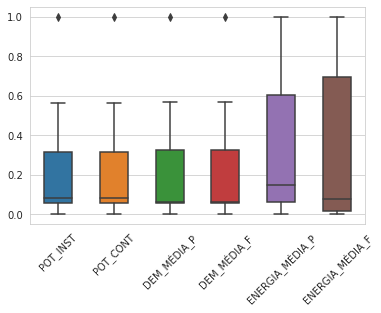

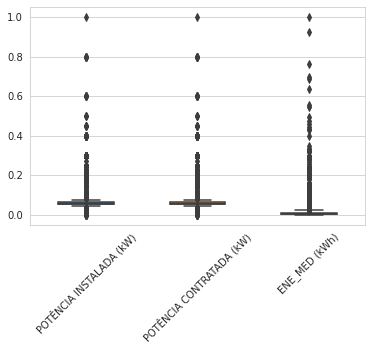

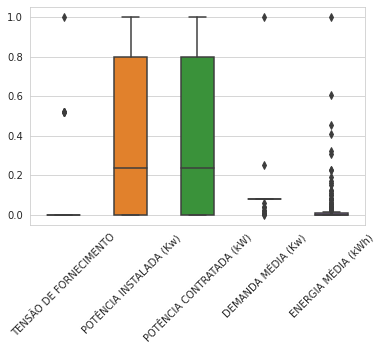

In [25]:
for idx, df in enumerate(df_norm):
    plt.figure(idx+1)
    plt.xticks(rotation=45)

    sns.set_style("whitegrid")
    ax = sns.boxplot(data=df, order=list(df.columns.values[columns_to_norm[idx]:]), width=0.50)

plt.show()